#*Proyecto 1 "Relación Minutos Ingreso”**



**Nombres de los integrantes del grupo:**


*   CRISTIAN FELIPE BARBOSA TUNJANO
*   DAVID BORRERO DIAZ
*   MICHAEL ALEJANDRO GOMEZ RAMIREZ
*   NICOLAS SUAREZ


**Una explicación breve del problema teniendo en cuenta lo siguiente:**

Este estudio tiene como objetivo investigar la relación entre el total de minutos utilizados por los clientes y sus ingresos totales en una empresa de telecomunicaciones. Utilizando la base Credito_dias.csv, emplearemos un enfoque que combina análisis estadístico, descriptivo, visualización de datos y técnicas de modelado predictivo como la correlación y regresión lineal. Además, consideraremos variables adicionales como la posesión de tarjeta de crédito y la antigüedad. Este enfoque nos permitirá identificar posibles relaciones lineales entre las variables de estudio, sino que también proporcionará valiosos insights para la toma de decisiones estratégicas en la mejora de productos y campañas publicitarias de la empresa.

In [403]:
import pandas as pd
import seaborn as sns
import  matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("https://raw.githubusercontent.com/Izainea/seminario-de-programacion/master/Cuadernos/Clase%202/Bases/Credito_dias.csv")

In [404]:
#borraremos customer id que no deberia ser una variable de interes para el ejercicio
df = df.drop(['Customer_ID'],axis=1)
df.shape

##Exploratorio totmou

In [406]:
#Contamos valores nulos
df['totmou'].isnull().sum()

0

In [407]:
df['totmou'].describe()

count     10000.000000
mean       7692.804866
std        8657.917883
min           0.000000
25%        2576.000000
50%        5262.000000
75%        9823.250000
max      163264.176700
Name: totmou, dtype: float64

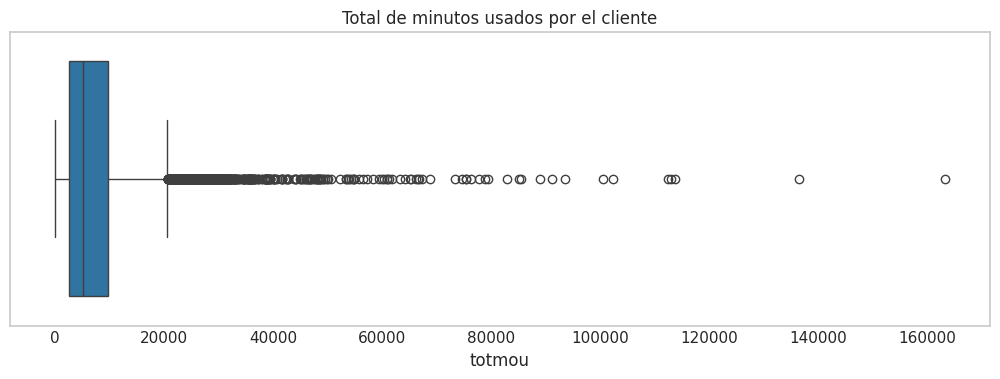

In [408]:
plt.figure(figsize=(10,3))
sns.boxplot(df['totmou'],orient='h')
plt.title('Total de minutos usados por el cliente')
plt.show()

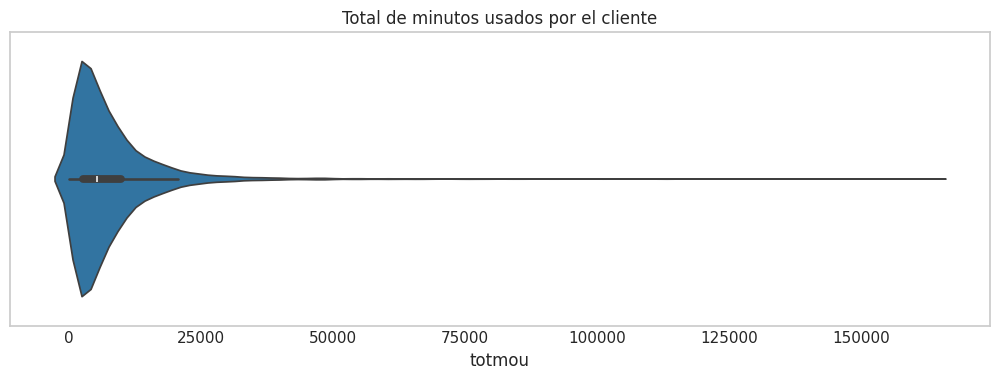

In [409]:
plt.figure(figsize=(10,3))
sns.violinplot(df['totmou'],orient='h')
plt.title('Total de minutos usados por el cliente')
plt.show()

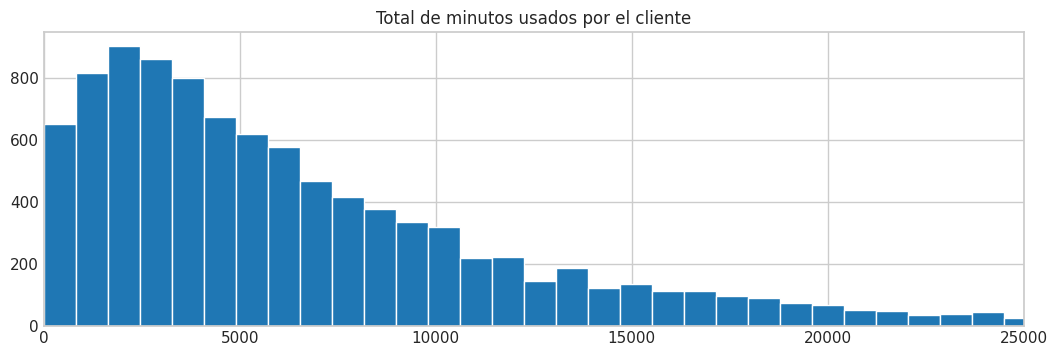

In [410]:
df['totmou'].hist(bins=200,figsize=(10,3))
plt.xlim(0, 25000)
plt.title('Total de minutos usados por el cliente')
plt.show()

**Observaciones:**

*   Cuenta con varios registros ourliers que se borrarian posteriormente
*   Se observa mucha desviación estandar lo que resulta en una variable con mucha dispersion
*   La mayoria de los clientes usan entre 0 y 10 mil minutos





##Exploratorio totrev

In [412]:
#Contamos valores nulos
df['totrev'].isnull().sum()

0

In [413]:
df['totrev'].describe()

count    10000.000000
mean      1042.133807
std        857.144895
min         11.100000
25%        526.787500
50%        820.235000
75%       1272.975000
max      13426.600000
Name: totrev, dtype: float64

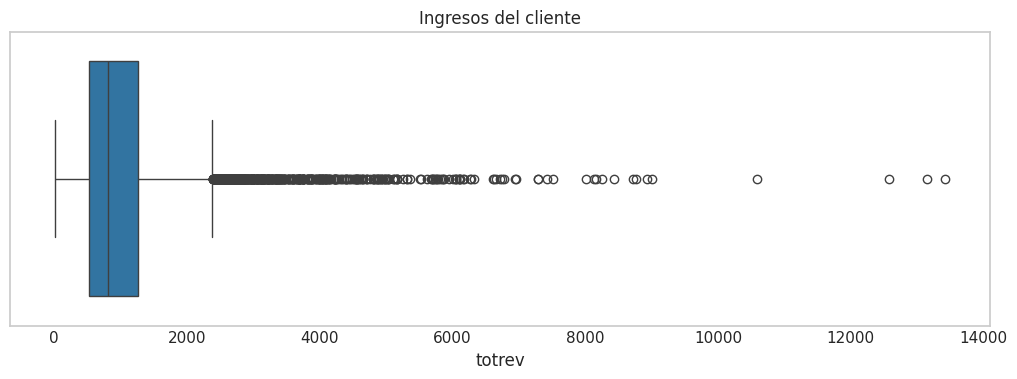

In [414]:
plt.figure(figsize=(10,3))
sns.boxplot(df['totrev'],orient='h')
plt.title('Ingresos del cliente')
plt.show()

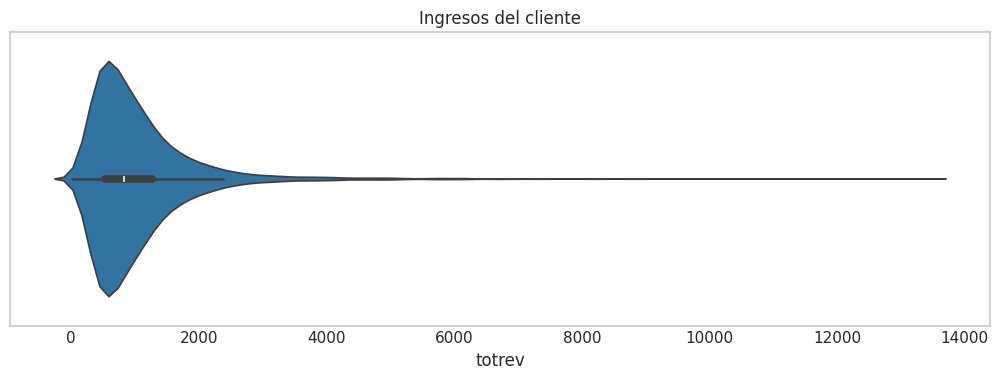

In [415]:
plt.figure(figsize=(10,3))
sns.violinplot(df['totrev'],orient='h')
plt.title('Ingresos del cliente')
plt.show()

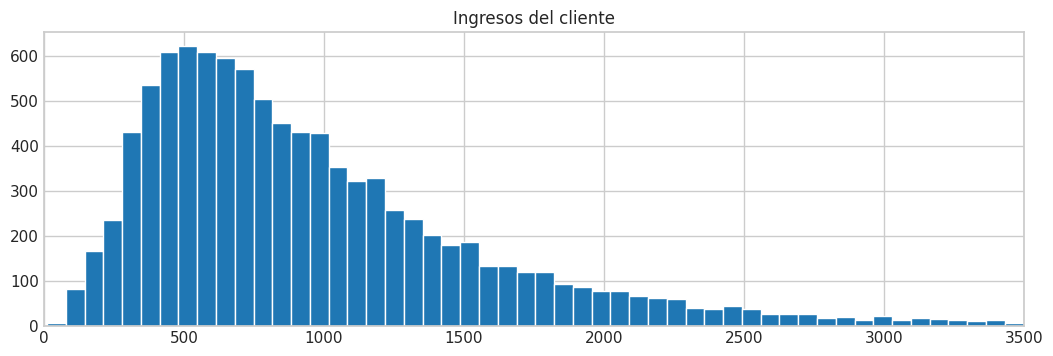

In [416]:
df['totrev'].hist(bins=200,figsize=(10,3))
plt.xlim(0, 3500)
plt.title('Ingresos del cliente')
plt.show()

**Observaciones:**


*   Una variable tambien con vastente dispersión de los datos
*   sin valores nulos
*   La mayoria de los clientes tiene en 0 y 2000 de ingresos





##Exploratorio eqpdays

In [417]:
#Contamos valores nulos
df['eqpdays'].isnull().sum()

0

In [418]:
df['eqpdays'].describe()

count    10000.000000
mean       386.794500
std        252.720196
min         -5.000000
25%        210.000000
50%        338.000000
75%        522.000000
max       1823.000000
Name: eqpdays, dtype: float64

In [449]:
#cantidad de registros con valores menores o iguales a 0
print( (df['eqpdays'] <= 0).sum())


22


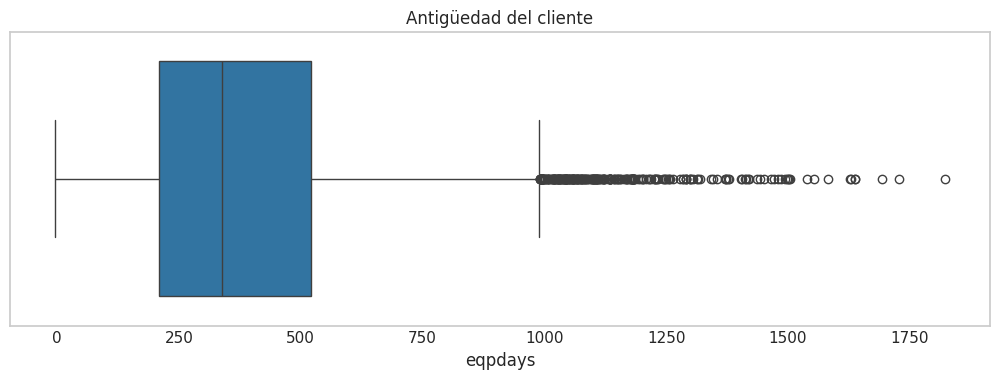

In [419]:
plt.figure(figsize=(10,3))
sns.boxplot(df['eqpdays'],orient='h')
plt.title('Antigüedad del cliente')
#plt.axvline(x=0, color='red', linestyle='-.', label='Línea en 0')
plt.show()

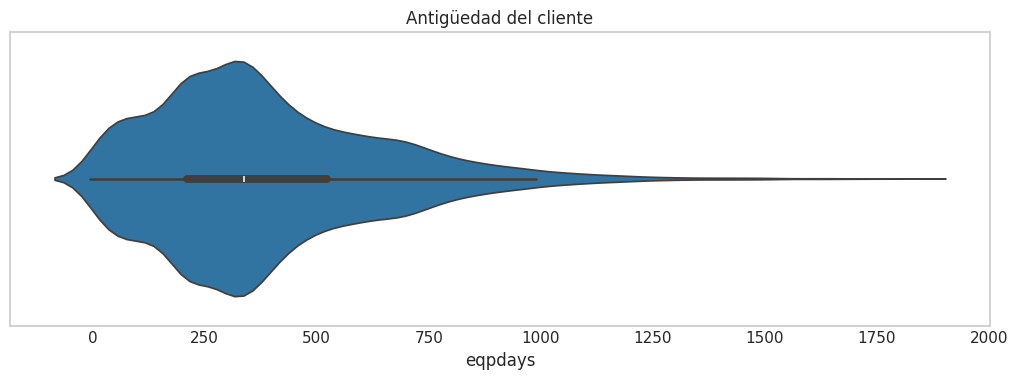

In [420]:
plt.figure(figsize=(10,3))
sns.violinplot(df['eqpdays'],orient='h')
plt.title('Antigüedad del cliente')
plt.show()

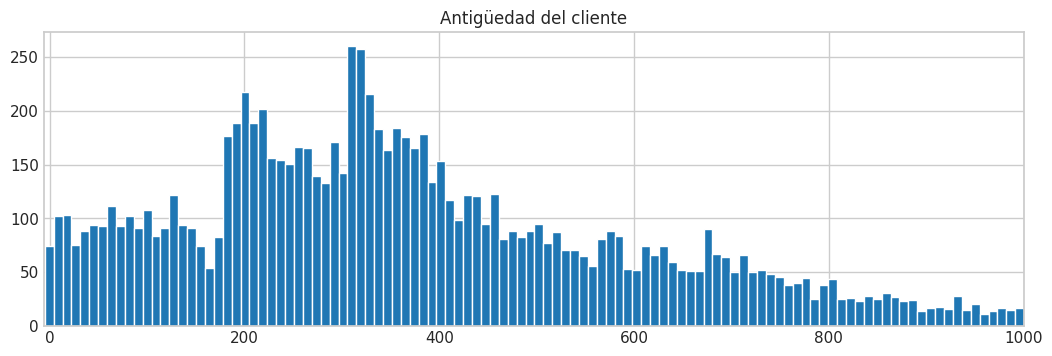

In [421]:
df['eqpdays'].hist(bins=200,figsize=(10,3))
plt.xlim(-6, 1000)
plt.title('Antigüedad del cliente')
plt.show()

**Observaciones:**

*   Tenemos 22 registros menores o iguales a 0 lo cual no tiene sentido para el proposito del ejercicio
*   El campo tiene bastante disperción
*   Elemento de la lista
*   Elemento de la lista





##Exploratorio creditcd

In [431]:
#Contamos valores nulos
df['creditcd'].isnull().sum()

152

In [432]:
df['creditcd'].describe()

count     9848
unique       2
top          Y
freq      6796
Name: creditcd, dtype: object

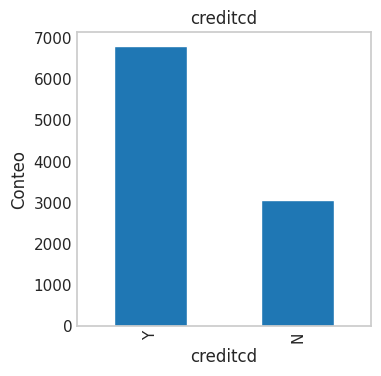

In [443]:
df['creditcd'].value_counts().plot(kind='bar',figsize=(3,3))
plt.title('creditcd')
plt.ylabel('conteo')
plt.show()

**Observaciones:**


*   El campo cuenta con 152 registros nulos. Se haria algun tipo de imputación que mantenga la relación porcentual de las categorias
*   El dos tercios de los registros corresponden a la categoria Y

#General

###Pairplot

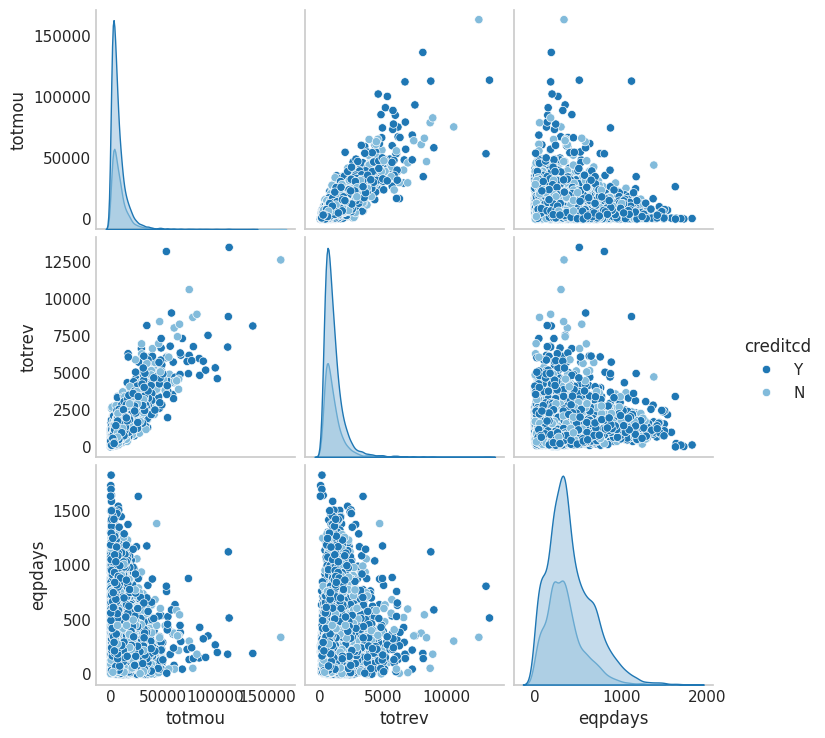

In [468]:
sns.pairplot(df,hue='creditcd')
plt.show()

##Mapa de Calor

<Axes: >

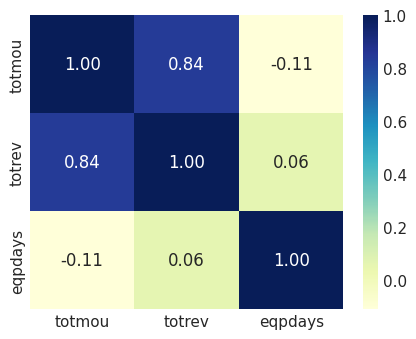

In [479]:
plt.figure(figsize=(4,3))
sns.heatmap(df.select_dtypes(include=['int64', 'float64']).corr(),annot=True,fmt=".2f",cmap="YlGnBu")

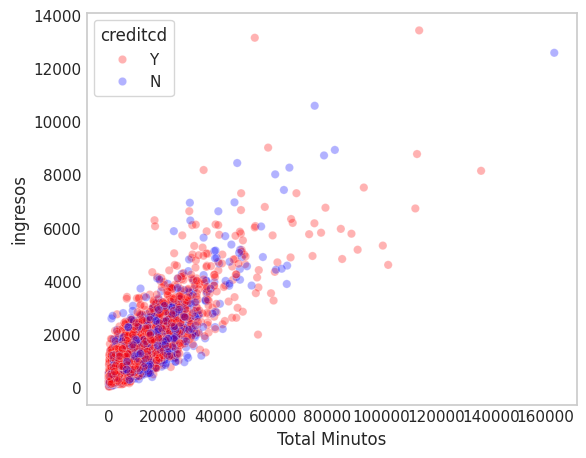

In [478]:
plt.figure(figsize=(5,4))

sns.scatterplot(x=df['totmou'],y=df['totrev'],alpha=0.3,hue=df['creditcd'],palette={'Y':'red','N':'blue'})

plt.xlabel('Total Minutos')
plt.ylabel('ingresos')
plt.show()

**¿Existe relación alguna entre el total de minutos usados con la compañía y el ingreso total de los clientes?**

Si, podemos evidenciar una correlación entre ingresos y minutos. Sin embargo, hay mucha dispersión lo cual baja hasta .84 la correlación entre estas variables

**El hecho de tener crédito afecta alguna de estas dos variables**

No, a simple vista por el diagrama de dispersión no hay una relación o una zona del scatter plot que este diferenciada en color por la leyenda si tiene o no tarjeta de credito